# Lending Club

LendingClub es una compañía estadounidense de préstamos entre pares, con sede en San Francisco, California. Fue el primer prestamista peer-to-peer en registrar sus ofertas como valores ante la Comisión de Bolsa y Valores (SEC) y en ofrecer negociación de préstamos en un mercado secundario.Desde 2007, más de 4 millones de miembros se han unido al Club para ayudarlos a alcanzar sus metas financieras. Como el único banco del mercado fintech de espectro completo a escala, nuestros miembros pueden obtener acceso a una amplia gama de productos y servicios financieros a través de una plataforma impulsada por la tecnología, diseñada para ayudarlos a pagar menos cuando piden prestado y ganan más cuando ahorran.

https://www.lendingclub.com/company/about-us

## Dependencias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings

pd.set_option('display.max_columns', None)
sns.set_palette('colorblind')
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

## Lectura de datos

Los datos fueron tomados de: https://www.kaggle.com/datasets/devanshi23/loan-data-2007-2014

In [2]:
df=pd.read_csv('~/loan_data_2007_2014.csv',index_col=0)
df.drop_duplicates(inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(466285, 74)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

### Limpieza previa de datos

#### Valores nulos

In [5]:
columnas_nulos=[*filter(lambda x: df[x].isnull().mean()==1,df.columns)]
columnas_nulos # Columnas con el 100% de valores nulos

['annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [6]:
len(columnas_nulos)

17

#### Variables unarias

In [7]:
columnas_unarias=[*filter(lambda x: df[x].nunique()==1,df.columns[~df.columns.isin(columnas_nulos)])]
columnas_unarias # Columnas con un único valor

['policy_code', 'application_type']

In [8]:
len(columnas_unarias)

2

#### Variables sin importancia para el modelo

In [9]:
inutiles=['id','member_id','emp_title','url','desc','zip_code','issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d','title']
len(inutiles)

12

#### Eliminar columnnas llenas de nulos, columndas con un solo valor y columnas sin importancia para el modelo

In [10]:
df.drop(columns=columnas_nulos+columnas_unarias+inutiles,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,other,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,0.0,NaN,NaN,NaN


In [11]:
df.shape

(466285, 43)

### Definir la variable objetivo

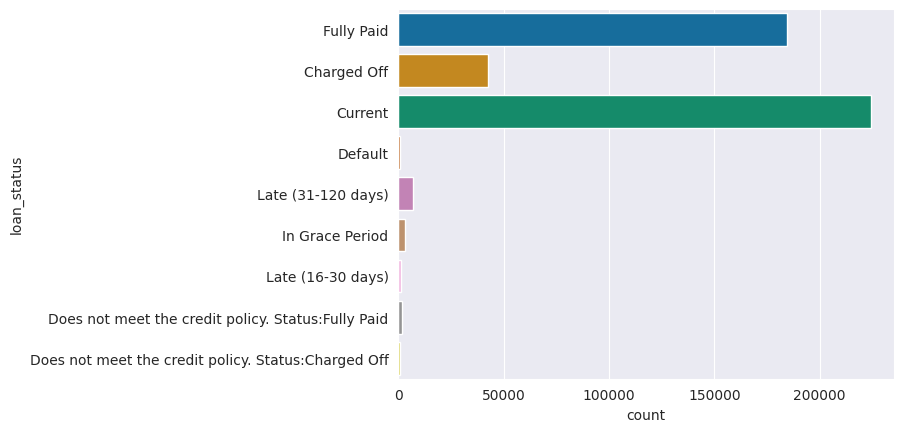

In [13]:
fig,ax=plt.subplots()
sns.countplot(y='loan_status',data=df,ax=ax)
plt.show()

In [14]:
buenos=['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']
malos= ['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

In [15]:
df['target']=(df['loan_status'].isin(malos)).astype(int) # 1 si es malo, 0 si es bueno

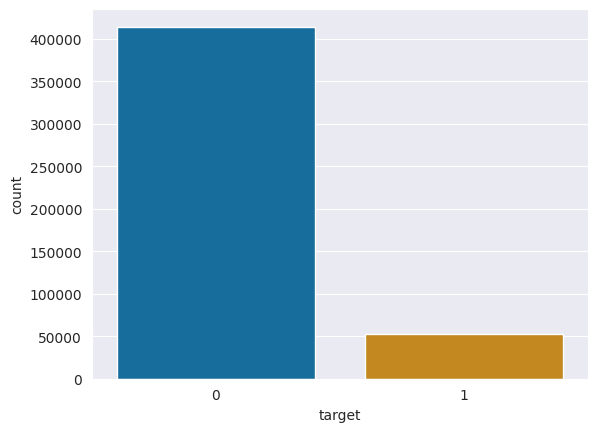

In [17]:
fig,ax=plt.subplots()
sns.countplot(x='target',data=df,ax=ax)
plt.show()

## Partición de datos

In [34]:
train,test=train_test_split(df,random_state=0,stratify=df['target'])
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
train.shape,test.shape

((349713, 44), (116572, 44))

In [32]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,3575,3575,3575.0,36 months,25.80,143.66,G,G1,10+ years,MORTGAGE,42500.0,Not Verified,Fully Paid,n,major_purchase,MO,22.00,2.0,1.0,7.0,52.0,11.0,1.0,6493,61.8,39.0,f,0.00,0.00,4184.450,4184.45,3575.00,609.45,0.0,0.0,0.0,3178.83,0.0,53.0,0.0,180.0,110389.0,10500.0,0
1,25000,25000,24775.0,36 months,13.53,848.75,B,B5,10+ years,MORTGAGE,120000.0,Source Verified,Fully Paid,n,debt_consolidation,FL,7.43,2.0,3.0,8.0,NaN,8.0,0.0,4994,38.4,31.0,f,0.00,0.00,28189.019,27935.32,25000.00,3189.02,0.0,0.0,0.0,18005.92,0.0,8.0,0.0,0.0,397499.0,13000.0,0
2,7550,7550,7550.0,36 months,13.98,257.97,C,C3,NaN,OWN,28000.0,Verified,Fully Paid,n,medical,NM,11.06,0.0,1.0,51.0,42.0,9.0,1.0,2190,30.4,28.0,w,0.00,0.00,8625.380,8625.38,7550.00,1075.38,0.0,0.0,0.0,5271.77,0.0,51.0,0.0,11601.0,4740.0,7200.0,0
3,4375,4375,4375.0,36 months,17.27,156.57,C,C5,< 1 year,MORTGAGE,56000.0,Not Verified,Current,n,debt_consolidation,FL,23.23,0.0,0.0,43.0,NaN,7.0,0.0,2823,80.7,13.0,w,750.12,750.12,4853.670,4853.67,3624.88,1228.79,0.0,0.0,0.0,156.57,0.0,NaN,0.0,0.0,57076.0,3500.0,0
4,10000,10000,10000.0,36 months,14.49,344.17,C,C4,10+ years,MORTGAGE,97000.0,Verified,Fully Paid,n,debt_consolidation,AZ,13.79,0.0,3.0,69.0,40.0,15.0,1.0,7553,46.3,38.0,w,0.00,0.00,11454.100,11454.10,10000.00,1454.10,0.0,0.0,0.0,6979.89,0.0,69.0,0.0,0.0,253173.0,16300.0,0


In [31]:
test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,20000,20000,20000.0,60 months,15.61,482.23,D,D1,3 years,RENT,55000.0,Source Verified,Fully Paid,n,debt_consolidation,MN,17.15,1.0,0.0,9.0,NaN,20.0,0.0,9242,40.7,35.0,w,0.00,0.00,24140.29,24140.29,20000.00,4140.29,0.0,0.00,0.0000,16424.61,0.0,NaN,0.0,0.0,50958.0,22700.0,0
1,27575,27575,27575.0,60 months,19.05,716.07,D,D4,6 years,MORTGAGE,62000.0,Verified,Charged Off,n,debt_consolidation,KS,18.50,0.0,0.0,NaN,NaN,9.0,0.0,18713,89.5,14.0,w,0.00,0.00,23186.20,23186.20,9291.59,10042.30,0.0,3852.31,693.4158,716.07,0.0,NaN,0.0,0.0,159210.0,20900.0,1
2,3975,3975,3975.0,36 months,10.16,128.57,B,B1,6 years,MORTGAGE,74100.0,Not Verified,Fully Paid,n,debt_consolidation,NJ,8.34,0.0,2.0,27.0,NaN,10.0,0.0,10486,69.0,40.0,f,0.00,0.00,4041.54,4041.54,3975.00,66.54,0.0,0.00,0.0000,3913.28,0.0,NaN,0.0,0.0,379753.0,15200.0,0
3,9500,9500,9500.0,36 months,14.09,325.11,B,B5,10+ years,RENT,53250.0,Not Verified,Current,n,credit_card,HI,21.78,0.0,1.0,NaN,NaN,12.0,0.0,24521,81.3,23.0,w,638.64,638.64,11053.74,11053.74,8861.36,2192.38,0.0,0.00,0.0000,325.11,0.0,NaN,0.0,0.0,30865.0,30162.0,0
4,25000,25000,25000.0,36 months,14.16,856.39,C,C2,10+ years,OWN,80000.0,Source Verified,Current,n,debt_consolidation,NY,15.43,2.0,0.0,3.0,12.0,29.0,2.0,12004,30.9,35.0,f,11709.97,11709.97,17984.19,17984.19,13290.03,4694.16,0.0,0.00,0.0000,856.39,0.0,3.0,0.0,0.0,29456.0,38800.0,0


In [35]:
train.to_csv('~/train.csv',index=False)
test.to_csv('~/test.csv',index=False)